<a href="https://colab.research.google.com/github/jaqueline-amorim/Biblioteca-Pysal/blob/main/Biblioteca_Pysal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PySAL**
PySAL é um acrônimo para Python Spatial Analysis Library. 
Trata-se de uma biblioteca de código aberto que permite fazer análises exploratórias espaciais (em inglês ESDA = Exploratory Spatial Data Analysis). 
A biblioteca PySAL contém vários pacotes com funções espaciais:

 - libpysal: contém algoritmos e estruturas de dados que servem de base para todas as outras bibliotecas; 
- esda: contém implementações de medidas para análises espaciais, oferecendo estatísticas sobre influência das fronteiras e medidas de correlação; 
- splot: contém implementações de visualizações estatísticas para análises espaciais.

# Preparando o ambiente 

In [ ]:
# Preparando o ambiente no Google Drive:

#importando a biblioteca
from google.colab import drive

# Isso irá pedir sua autorização
drive.mount('/content/drive')

# Agora, seu Drive estará disponível em: /data/drive/My Drive

Mounted at /content/drive


In [ ]:
#Instalando a biblioteca
! pip install pysal

In [ ]:
#Instalando a biblioteca
! pip install esda

In [ ]:
#Instalando a biblioteca
! pip install geopandas

In [ ]:
#Instalando a biblioteca
! pip install contextily

In [ ]:
#Instalando a biblioteca
! pip install mapclassify

In [ ]:
#Importando as bibliotecas 
import libpysal as lps
import mapclassify 
import pandas as pd
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import esda
import contextily as cx

from libpysal.weights.contiguity import Queen

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
#Importando as bibliotecas 
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline 

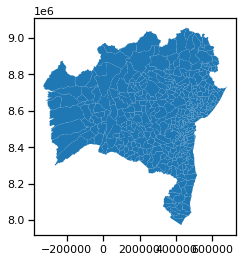

In [ ]:
#Lendo os dados
shp_link = '/content/drive/My Drive/geo/shapes/Densidade.shp'
ba = gpd.read_file(shp_link)
ba.plot()

In [ ]:
#Visualizando a tabela de atributos 
ba

,Codigo,Nome,SIGLA_UF,pop_2000,pop_bra_00,pop_neg_00,pop_2010,pop_bra_10,pop_neg_10,area,dens_10,dens_00,geometry
0,2900108,Abaíra,BA,9067,5764,591,8316,3590,368,538.678,15.438,16.832,"POLYGON ((185930.151 8536644.486, 185974.427 8..."
1,2900207,Abaré,BA,13648,2463,582,17064,2006,1638,1604.907,10.632,8.504,"POLYGON ((450162.730 9033089.157, 450564.636 9..."
2,2900306,Acajutiba,BA,14322,3198,1293,14653,3064,1958,181.474,80.744,78.920,"POLYGON ((602822.575 8709801.249, 603256.932 8..."
3,2900355,Adustina,BA,14302,5639,312,15702,5247,866,629.098,24.960,22.734,"POLYGON ((594196.382 8836611.134, 594192.537 8..."
4,2900405,Água Fria,BA,14966,1408,1865,15731,1256,2934,742.774,21.179,20.149,"POLYGON ((527503.459 8707358.333, 527509.728 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2933307,Vitória da Conquista,BA,262494,94826,17169,306866,99194,31218,3254.186,94.299,80.663,"POLYGON ((288649.623 8364114.875, 288658.287 8..."
413,2933406,Wagner,BA,8976,1445,1087,8983,1233,1009,522.371,17.197,17.183,"POLYGON ((256791.967 8657101.559, 257404.388 8..."
414,2933455,Wanderley,BA,13649,4114,379,12485,3310,765,2920.578,4.275,4.673,"POLYGON ((-49316.223 8718882.257, -49269.506 8..."
415,2933505,Wenceslau Guimarães,BA,23926,3483,2263,22189,3161,4336,655.237,33.864,36.515,"POLYGON ((415585.831 8495175.729, 415580.179 8..."


In [ ]:
#Visualizando informações dos dados 
ba.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Codigo      417 non-null    object  
 1   Nome        417 non-null    object  
 2   SIGLA_UF    417 non-null    object  
 3   pop_2000    417 non-null    object  
 4   pop_bra_00  417 non-null    object  
 5   pop_neg_00  417 non-null    object  
 6   pop_2010    417 non-null    int64   
 7   pop_bra_10  417 non-null    int64   
 8   pop_neg_10  417 non-null    int64   
 9   area        417 non-null    float64 
 10  dens_10     417 non-null    float64 
 11  dens_00     417 non-null    float64 
 12  geometry    417 non-null    geometry
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 42.5+ KB


In [ ]:
#Convertendo os dados para SIRGAS 2000 - UTM 24S
ba = ba.to_crs(31984)

In [ ]:
#Lendo os dados da coluna dens_10 (Densidade demográfica de Bahia em 2010 - IBGE)
ba = ba.dropna(subset=['dens_10'])

(-379495.93904107664, 731465.6573586002, 7916837.218847999, 9111059.512629217)

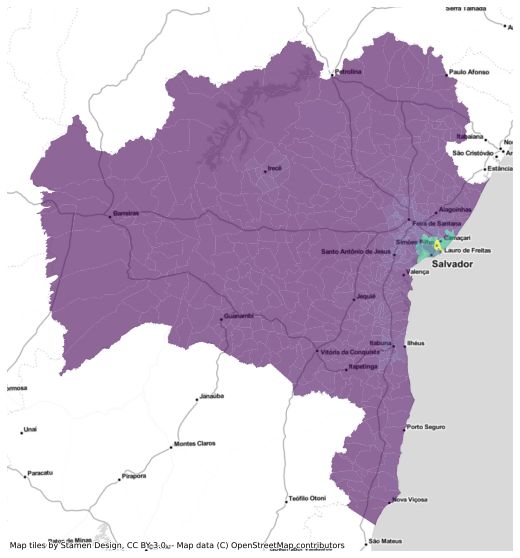

In [ ]:
#Plotando o mapa em geopandas 
f, ax = plt.subplots(figsize=(10,10))

ba.plot('dens_10', ax=ax, alpha=0.6)
cx.add_basemap(ax, crs=ba.crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')

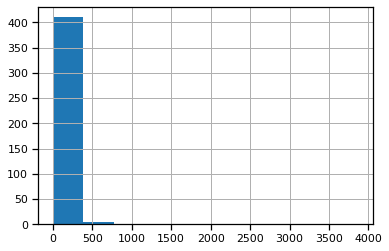

In [ ]:
#Histograma dos dados 
ba.dens_10.hist()

# Autocorelação espacial 
O conceito de autocorrelação espacial está relacionado com a combinação de dois tipos de similitude espacial: semelhança e semelhança de atributos. Embora existam muitos meios diferentes de autocorrelação espacial, todos eles combinam estes dois tipos de similitude numa medida sumária.

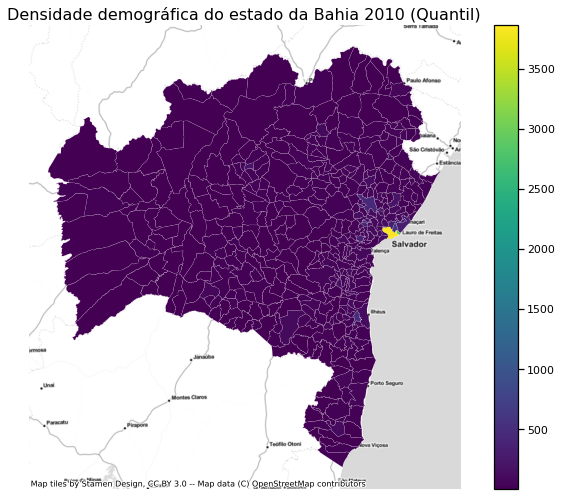

In [ ]:
#Pesos espaciais 
fig, ax = plt.subplots(figsize=(10,7))

ba.dropna(subset=['dens_10']).to_crs(epsg=31984).plot('dens_10', legend=True, 
 Linewidth=0.1, ax=ax, edgecolor='white')

cx.add_basemap(ax, crs=ba.crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')

plt.title('Densidade demográfica do estado da Bahia 2010 (Quantil)', fontsize=16)

plt.axis('off')
plt.tight_layout()

# Semelhança espacial 
Já encontramos pesos espaciais num bloco de notas anterior, na análise de autocorrelação espacial, os pesos espaciais são utilizados para formalizar a noção de semelhança espacial, há muitas formas de definir pesos, aqui usaremos a contiguidade Queen : 

In [ ]:
#Usando a contiguidade Queen
wq = lps.weights.Queen.from_dataframe(ba)
wq.transform = 'r'

# Atribuir similaridade
Assim, o peso espacial entre os bairros a e b indica se os dois são vizinhos. O que também precisamos é de uma medida de semelhança de atributos para emparelhar com este conceito de semelhança espacial.*italicized text* 
O desfasamento espacial é uma variável derivada que o realiza para nós.

In [ ]:
#Desfasamento espacial 
y = ba['dens_10']
ylag = lps.weights.lag_spatial(wq,y)

[]

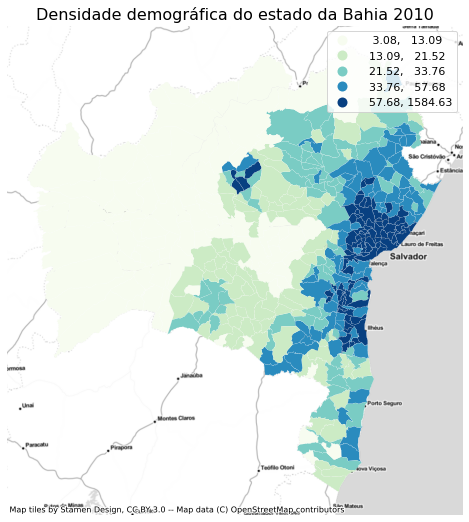

In [ ]:
f, ax = plt.subplots(1, figsize=(10,9))

ba.assign(cl=ylag).plot(column='cl', scheme='quantiles',
  k=5, cmap='GnBu', Linewidth=0.1, ax=ax,
  edgecolor='white', legend=True)

cx.add_basemap(ax, crs=ba.crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')

plt.title('Densidade demográfica do estado da Bahia 2010', fontsize=16)

plt.plot()

(-379495.9390410766, 731465.6573586002, 7916837.218847999, 9111059.512629217)

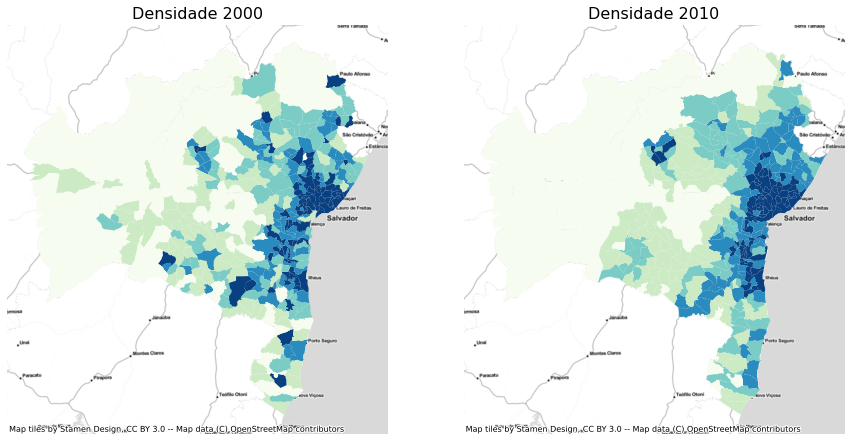

In [ ]:
#Comparação entre os dados do censo de 2000 e 2010 (IBGE)
ba['dens_10'] = ylag

f,ax = plt.subplots(1,2,figsize=(15,10))

ba.plot(column='dens_00', ax=ax[0],
	scheme='quantiles', k=5, cmap='GnBu')

ax[0].set_title('Densidade 2000', fontsize=16)

ba.plot(column='dens_10', ax=ax[1],
	scheme='quantiles', k=5, cmap='GnBu')

cx.add_basemap(ax[0], crs=ba.crs.to_string(), source=cx.providers.Stamen.TonerLite)

cx.add_basemap(ax[1], crs=ba.crs.to_string(), source=cx.providers.Stamen.TonerLite)

ax[1].set_title('Densidade 2010', fontsize=16)
ax[0].axis('off')
ax[1].axis('off')

# Joins
Uma forma de formalizar um teste de autocorrelação espacial num atributo binário é considerar as chamadas "junções". 
Existe uma união para cada par de observações vizinho, as uniões reflectem-se nos nossos pesos espaciais binários wq. Cada unidade pode assumir um de dois valores "Preto" ou "Branco".

In [ ]:
#Encontrando a media 
y.median()

27.283499999999997

In [ ]:
#Avaliando os dados gerais 
ba.shape

(417, 13)

In [ ]:
#Criando uma nova variável 
yb = y > y.median()
sum(yb)

208

In [ ]:
#Dividindo os dados entre acima da media (preto) e abaixo da media (branco)
yb = y > y.median()
labels = ['0 baixo', '1 alto']
yb = [labels[i] for i in 1*yb]
ba['yb'] = yb

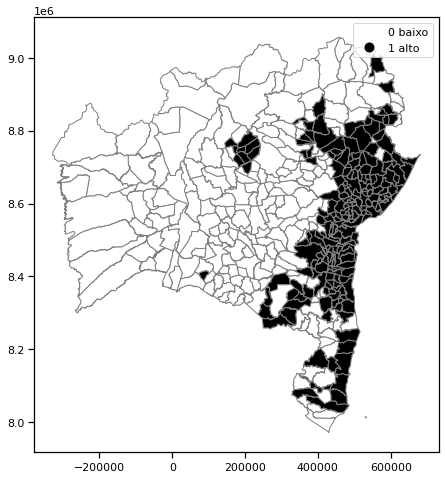

In [ ]:
#Plotando o mapa das medias 
fig, ax = plt.subplots(figsize=(10,8))
ba.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)